# Recognizing handwritten digits with sklearn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#scikit learn 
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn

# Load the digits dataset

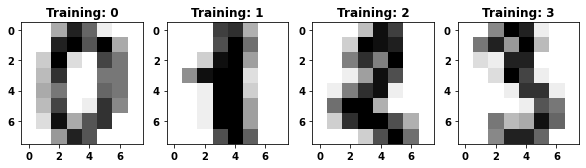

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# 0. Training a simple model

In [4]:
# flatten the images
list_of_images = digits.images

n_samples = len(list_of_images)
data = list_of_images.reshape((n_samples, -1))

targets = digits.target

# Create a classifier: a support vector classifier
model = svm.SVC(gamma=0.01)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
model.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

In [5]:
wrong_guesses = np.where(predicted != y_test)

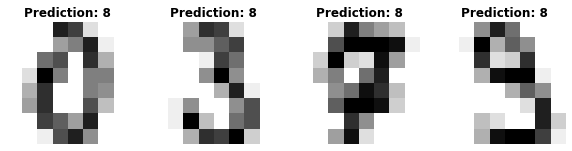

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[wrong_guesses], predicted[wrong_guesses]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [7]:
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.01):
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        88
           1       1.00      0.74      0.85        91
           2       1.00      0.64      0.78        86
           3       1.00      0.64      0.78        91
           4       1.00      0.55      0.71        92
           5       0.93      0.98      0.95        91
           6       1.00      0.68      0.81        91
           7       1.00      0.49      0.66        89
           8       0.25      1.00      0.40        88
           9       1.00      0.61      0.76        92

    accuracy                           0.70       899
   macro avg       0.92      0.70      0.75       899
weighted avg       0.92      0.70      0.75       899




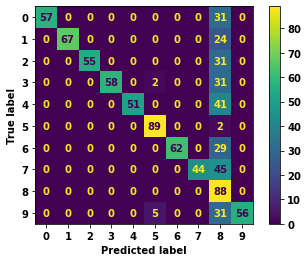

In [8]:
cm = confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Hyperparameter optimization

1e-05
5e-05
0.0001
0.0005
0.001
0.005
0.01
0.1


<IPython.core.display.Javascript object>


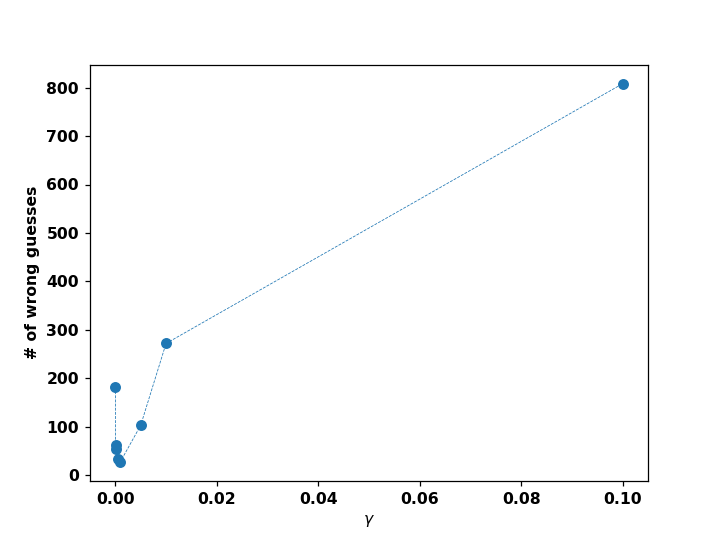

Text(0, 0.5, '# of wrong guesses')

In [9]:
%matplotlib notebook
# flatten the images
list_of_images = digits.images

n_samples = len(list_of_images)
data = list_of_images.reshape((n_samples, -1))

targets = digits.target
WG=[]
list_gamma = [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.1]
for gamma in list_gamma:
    print(gamma)
    # Create a classifier: a support vector classifier
    model = svm.SVC(gamma=gamma)

    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        data, targets, test_size=0.5, shuffle=False)

    # Learn the digits on the train subset
    model.fit(X_train, y_train)

    # Predict the value of the digit on the test subset
    predicted = model.predict(X_test)

    wrong_guesses = np.where(predicted != y_test)

    WG.append(len(wrong_guesses[0]))

plt.subplots()
plt.plot(list_gamma, WG, 'o', lw=0.5,ls='--')
plt.xlabel(r'$\gamma$')
plt.ylabel("# of wrong guesses")

# Other models

In [12]:
import sklearn.ensemble
import sklearn.neural_network

# flatten the images
list_of_images = digits.images

n_samples = len(list_of_images)
data = list_of_images.reshape((n_samples, -1))

targets = digits.target

# Create a classifier: a support vector classifier
models = [svm.SVC(gamma=0.001),
        sklearn.ensemble.RandomForestClassifier(n_estimators=100),
        sklearn.neighbors.KNeighborsClassifier(n_neighbors=5),
        sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(1000))]

for model in models:
    print(model)
    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        data, targets, test_size=0.5, shuffle=False)

    # Learn the digits on the train subset
    model.fit(X_train, y_train)

    # Predict the value of the digit on the test subset
    predicted = model.predict(X_test)
    wrong_guesses = np.where(predicted != y_test)

    print('# of wrong guesses : ', len(wrong_guesses[0]))
    

SVC(gamma=0.001)
# of wrong guesses :  28
RandomForestClassifier()
# of wrong guesses :  57
KNeighborsClassifier()
# of wrong guesses :  40
MLPClassifier(hidden_layer_sizes=1000)
# of wrong guesses :  48
